# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2023-03-18 23:24:10 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package CUDA...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, haswell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/lib64-nvidia
  JULIA_NUM_THREADS = 2


# Instalación de ThinkJulia

In [ ]:
# Importamos el paquete "Pkg" para poder instalar paquetes
# Luego, instalamos el paquete "ThinkJulia"
using Pkg

Pkg.add(url="https://github.com/BenLauwens/ThinkJulia.jl")

     Cloning git-repo `https://github.com/BenLauwens/ThinkJulia.jl`
    Updating git-repo `https://github.com/BenLauwens/ThinkJulia.jl`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed JpegTurbo_jll ───────────── v2.1.91+0
   Installed x265_jll ────────────────── v3.5.0+0
   Installed libfdk_aac_jll ──────────── v2.0.2+0
   Installed Libmount_jll ────────────── v2.35.0+0
   Installed LERC_jll ────────────────── v3.0.0+1
   Installed Opus_jll ────────────────── v1.3.2+0
   Installed OffsetArrays ────────────── v1.12.9
   Installed ImageMagick ─────────────── v0.7.9
   Installed Contour ─────────────────── v0.5.7
   Installed Measures ────────────────── v0.3.2
   Installed Grisu ───────────────────── v1.0.2
   Installed RecipesPipeline ─────────── v0.1.13
   Installed Xorg_libpthread_stubs_jll ─ v0.1.0+3
   Installed PlotUtils ───────────────── v0.6.5
   Installed StaticArrays ────────────── v1.5.17
   Installed FileIO ────────────

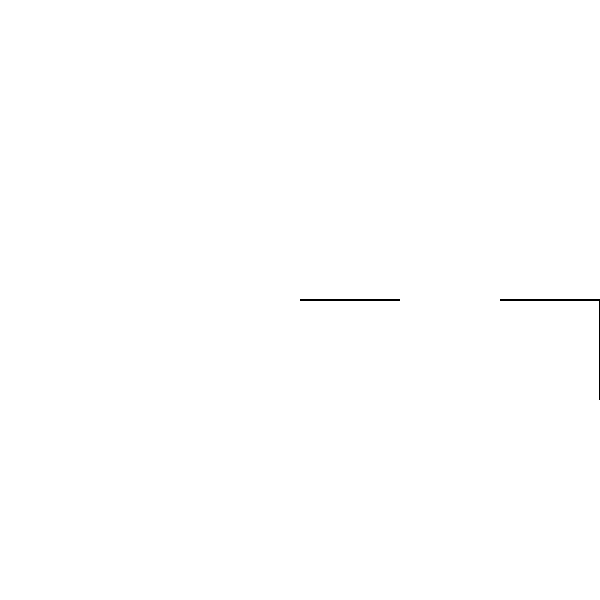

In [ ]:
using ThinkJulia

# Inicializamos nuestra tortuga en el origen del plano
🐢 = Turtle()

d = 100

# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin
    forward(🐢, d)
    penup(🐢)
    forward(🐢, d)
    pendown(🐢)
    forward(🐢, d)
    turn(🐢, 90)
    forward(🐢, d)
end


**Ejercicio** Dibuja una línea punteada con 5 líneas negras de 10 unidades de distancia cada una con 10 unidades de distancia entre ellas. (Sugerencia: copia el código de la celda anterior y modifícalo a tu conveniencia.)

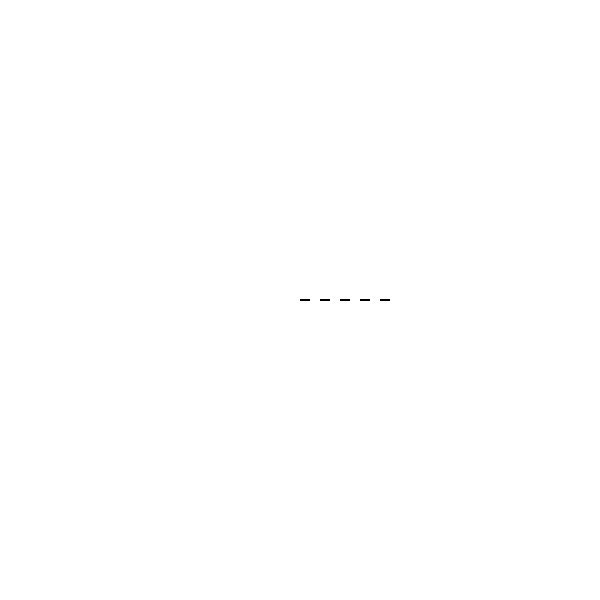

In [ ]:


# Inicializamos nuestra tortuga en el origen del plano
🐢 = Turtle()

d = 10

# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin
    forward(🐢, d)
    penup(🐢)
    forward(🐢, d) #Aquí le pido a la tortuga que alce su pluma una distancia 10.
    pendown(🐢)
    forward(🐢, d) #Aquí le pido a la tortuga que pinte una linea con distancia "d1".
    penup(🐢)
    forward(🐢, d) #Aquí le pido a la tortuga que alce su pluma una distancia 10.
    pendown(🐢)
    forward(🐢, d) #Aquí le pido a la tortuga que pinte una linea con distancia "d1".
    penup(🐢)
    forward(🐢, d) #Aquí le pido a la tortuga que alce su pluma una distancia 10.
    pendown(🐢)
    forward(🐢, d) #Aquí le pido a la tortuga que pinte una linea con distancia "d1".
    penup(🐢)
    forward(🐢, d) #Aquí le pido a la tortuga que alce su pluma una distancia 10.
    pendown(🐢)
    forward(🐢, d)#Aquí le pido a la tortuga que pinte una linea con distancia "d1".
end



**Ejercicio** Si no utilizaste un ciclo para resolver el ejercicio anterior, reescribe tu programa utilizando un ciclo for o while.

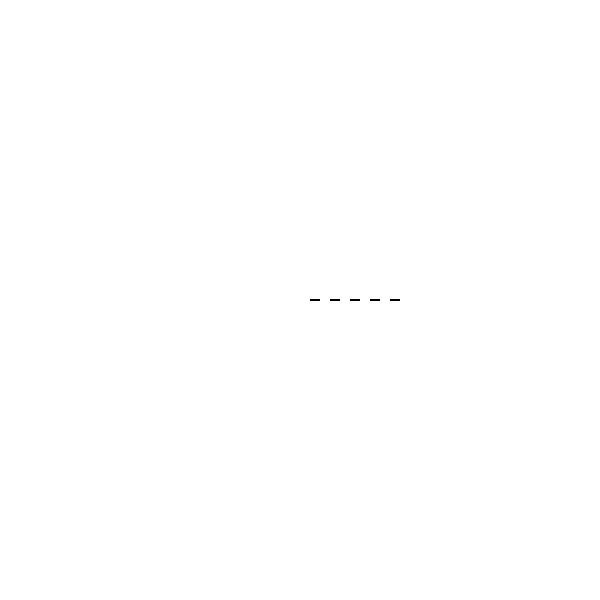

In [ ]:
# Inicializamos nuestra tortuga en el origen del plano
🐢 = Turtle()

d = 10

# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin

        for i in 1:5 #Aquí uso un ciclo for para que me ejecute las intrucciones 5 veces.
        penup(🐢)
        forward(🐢, 10) #Aquí le pido a la tortuga que alce su pluma una distancia 10.
        pendown(🐢)
        forward(🐢, 10) #Aquí le pido a la tortuga que pinte una línea con distancia 10.
        end
end

**Ejercicio** Haz un programa que tome tres parámetros n, d1 y d2 (los cuales puedes definir como variables en la misma celda) y dibuje n líneas de longitud d1 con una distancia de separación d2 entre ellas utilizando un ciclo for o while.

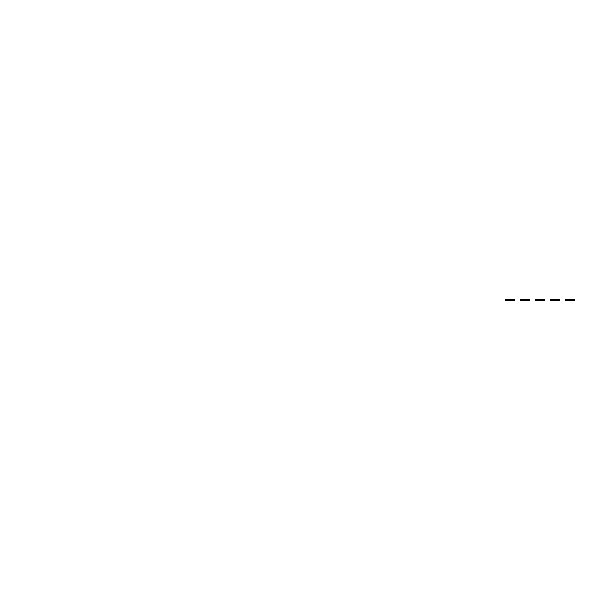

In [ ]:
function lineas(n, d1, d2) #Aquí defino una función que pide los parámetros del problema.
    @svg begin
        for i in 1:n #Aquí uso un ciclo for para que me ejecute las intrucciones "n" veces.
        penup(🐢) #Aquí le pido a la tortuga que alce su pluma una distancia "d2".
        forward(🐢, d2)
        pendown(🐢)  #Aquí le pido a la tortuga que pinte una linea con distancia "d1".
        forward(🐢, d1)
        end
    end
end

lineas(5,10,5) #Aquí evalúo la función con valores n=3, d1=10, d2=5

**Ejercicio** Haz un programa que dibuje un triángulo equilátero de lado d.

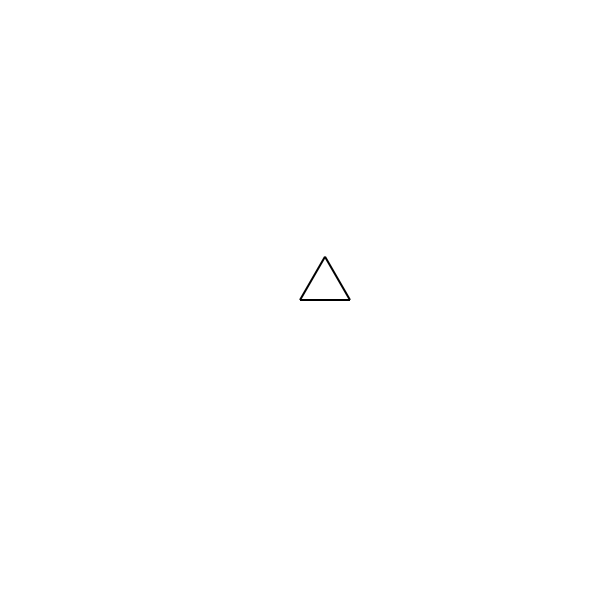

In [104]:
🐢 = Turtle()

function triangulo(d) #Aquí defino una función que pide la longitud de los lados del triángulo
@svg begin
    forward(🐢, d)
    turn(🐢, -120) #Aquí le pido a la tortuga que pinte una línea de longitud "d" y 
                    #que gire "-120°" ya que el triángulo equilatero tiene un angulo interior de "60°" y "-180°+60°=-120°",
                    #así sucesivamente con lo demás lados.
    forward(🐢, d)
    turn(🐢, -120)
    forward(🐢, d)
end
end

triangulo(50)

**Ejercicio** Generaliza el programa anterior a uno que tome dos parámetros n y d y dibuje un polígono regular de n lados de longitud d utilizando un ciclo for o while

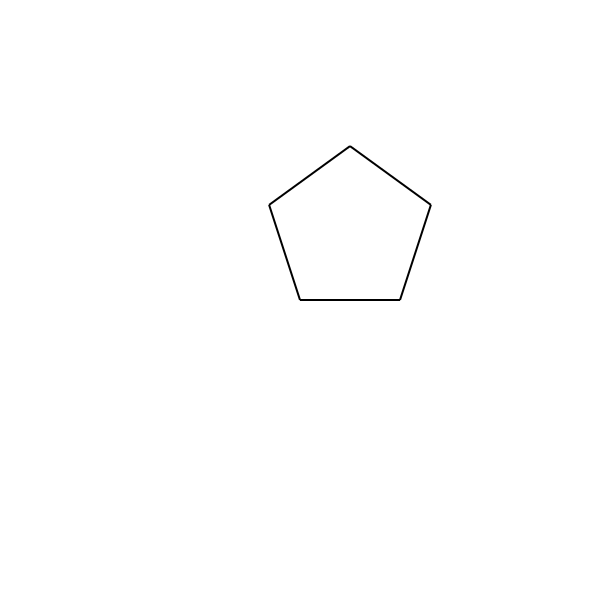

In [121]:
🐢 = Turtle()

function poligono(n,d) #Aquí defino una función que pide la longitud y número de lados del polígono.

ang=-180+180(n-2)/n #Aquí defino el ángulo que debe girar la tortuga, que es -180° mas el ángulo interior del polígono.

    @svg begin
    
        for i in 1:n #Aquí uso un ciclo for para que me ejecute las intrucciones "n" veces.
        forward(🐢, d)
        turn(🐢, ang) #Aquí le pido a la tortuga que pinte una línea de longitud "d" y 
                        #que gire "ang" grados.
        end

    end
end

poligono(5,100)

#**Tortugas y fractales**
Podemos utilizar ciclos recursivos para dibujar fractales (o al menos una linda aproximación de ellos) con ayuda de nuestra amiga tortuga:

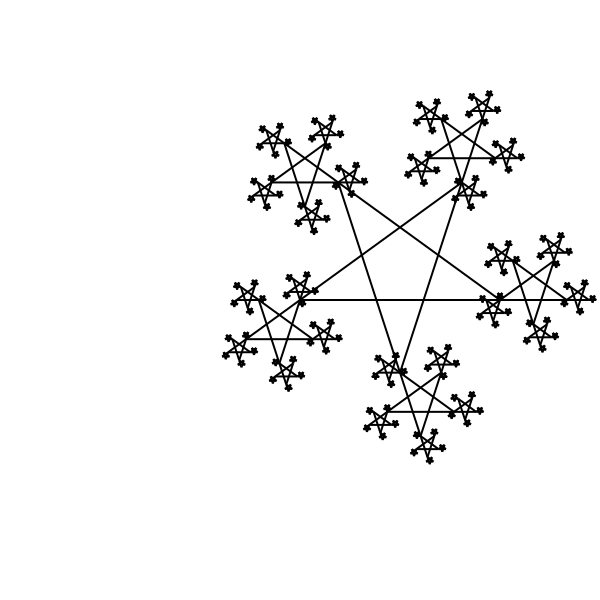

In [ ]:
function estrella(tort,dist)      #Sintáxis compacta.
    if dist <= 5
        return
    else
        for i in 1:5
            forward(tort,dist)
            estrella(tort,dist/3)
            turn(tort,216)
        end
    end
end

🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 200

@svg estrella(🐢,d)

**Ejercicio** Crea un fractal original con un ciclo recursivo.

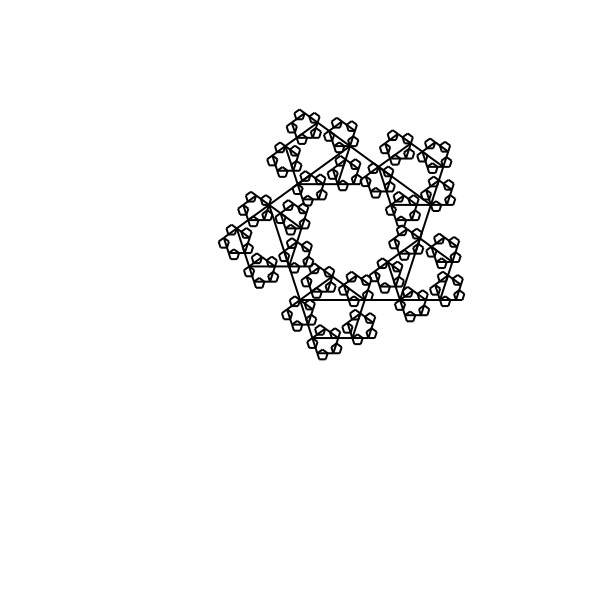

In [135]:
function estrella(tort,dist)      #Sintáxis compacta.
    if dist <= 3
        return
    else
        for i in 1:5
            forward(tort,dist)
            estrella(tort,dist/2.5)
            turn(tort,-72) #Yo quise hacer el fractal con pentágonos, por ello puse -180 mas el
                           #el ángulo interior del pentágono.
        end
    end
end

🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 100

@svg estrella(🐢,d)

# **Dato curioso**
El software del paquete ThinkJulia que acabamos de utilizar está basado en la biblioteca turtle de Python la cual, a su vez, está basada en el lenguaje de programación educativo Logo creado en 1967.

## Resumen

Los **ciclos** nos permiten _repetir_ procesos _hasta que_ una condición particular se satisfaga. En Julia, existen tres tipos de ciclos:
* **`while`**, que se ejecutan _mientras_ una condición se cumpla (o, equivalentemente, mientras no se deje de cumplir);
* **`for`**, que se ejecutan _por_ cada elemento de un arreglo, y por cada iteración se le asigna el valor del elemento en turno del arreglo a una variable conocida como _iterador_, que puede ser usada dentro del mismo ciclo;
* **recursivos**, que se crean mediante _funciones que se llaman a sí mismas_.

Se pueden crear ciclos _infinitos_ del primer y tercer tipo. Esto puede evitarse en un ciclo **`while`** asegurándose de que las instrucciones dentro del ciclo eventualmente hagan que la condición que determina su ejecución se evalúe a `false`. Para el caso de un ciclo **recursivo**, dentro de la definición de la función recursiva, _antes de que se llame a sí misma_, se debe colocar una declaración condicional de tal forma que uno de los caminos _posibles_ termine el ciclo.

También es posible iterar ciclos **`for`** sobre _rangos_, creados con la sintáxis $\color{green}{\text{a}}\color{magenta}{\textbf{:}}\color{green}{\text{b}}\color{magenta}{\textbf{:}}\color{green}{\text{c}}$, donde $\color{green}{\text{a}}$ es el punto de partida, $\color{green}{\text{b}}$ es la diferencia entre elementos adyacentes y $\color{green}{\text{c}}$ acota a los valores que se pueden incluir en el rango. Los rangos pueden ser convertidos a arreglos con `collect` y, junto con los ciclos **`for`**, sirven para definir arreglos _por comprensión_.

## Recursos complementarios
* Manual de Julia de [ciclos](https://docs.julialang.org/en/v1/manual/control-flow/#man-loops).
* Video [Programming Loops vs Recursion](https://www.youtube.com/watch?v=HXNhEYqFo0o) del canal de YouTube [Computerphile](https://www.youtube.com/@Computerphile).
* Sección "Turtles" del libro digital [Think Julia: How to Think Like a Computer Scientist](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#_turtles) de Ben Lauwens.

# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />